In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
import random
np.random.seed(seed=233423)


In [2]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b


def RhoSq(y_hat, y_true): # like in Turchin's original PCA paper
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )


In [3]:
Data = pd.read_excel("SPC1_Final.xlsx")

#
Maximum = max(Data.SPC)
Minimum = min(Data.SPC)
Data.SPC = (Data.SPC-Minimum)/(Maximum-Minimum) 
print(Minimum, Maximum)
print(min(Data.SPC), max(Data.SPC))

2.30065881002946 8.26820181756822
0.0 1.0


In [4]:
len(set(Data.PolID))

370

In [5]:
Data.query("NGA == 'Iceland'")

,NGA,PolID,Time,RelTime,SPC,Culture.Cont,Polity.Cont,Notes
347,Iceland,IsCommw,1000,NaN,0.308926,NaN,NewSeq,NaN
348,Iceland,IsCommw,1100,NaN,0.353376,NaN,NaN,NaN
349,Iceland,IsCommw,1200,NaN,0.405888,NaN,NaN,NaN
350,Iceland,NorKing,1300,NaN,0.474129,NaN,NaN,NaN


In [6]:
reltime = Data["RelTime"].copy()
del Data["RelTime"] # artefact of data preprocessing 

In [7]:
len(set(Data.NGA))

35

In [8]:
Data.head(), Data.columns

(               NGA    PolID  Time       SPC Culture.Cont Polity.Cont Notes
 0  Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   NaN
 1  Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   NaN
 2  Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   NaN
 3  Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   NaN
 4  Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   NaN,
 Index(['NGA', 'PolID', 'Time', 'SPC', 'Culture.Cont', 'Polity.Cont', 'Notes'], dtype='object'))

In [9]:
Data = Data.rename(columns = {"SPC": "PC1"})
Data.head(), Data.columns

(               NGA    PolID  Time       PC1 Culture.Cont Polity.Cont Notes
 0  Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   NaN
 1  Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   NaN
 2  Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   NaN
 3  Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   NaN
 4  Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   NaN,
 Index(['NGA', 'PolID', 'Time', 'PC1', 'Culture.Cont', 'Polity.Cont', 'Notes'], dtype='object'))

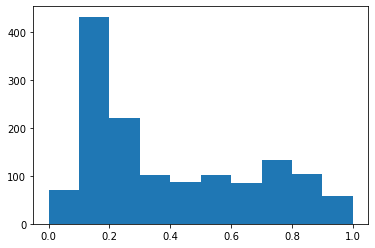

0.29682804546734304


In [10]:
plt.hist(Data.PC1)
plt.show()

print(np.median(Data.PC1))

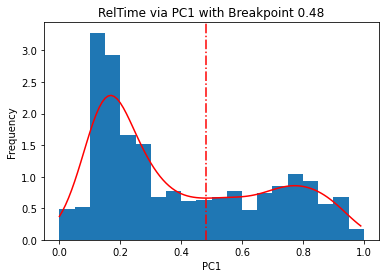

In [11]:
plt.hist(Data["PC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)

#KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
KDE_min = np.min(KDE[35:65])  # find the minimum in the centre


xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via PC1 with Breakpoint "+str(np.round(xmin[0],2)))
plt.xlabel("PC1")
plt.ylabel("Frequency")
plt.show()

PC_Break = xmin



In [12]:
print("Rescaled Breakpoint",PC_Break * (Maximum-Minimum)  + Minimum)


Rescaled Breakpoint [5.16507945]


In [13]:
#Data = pd.read_excel("sc.pc.15May2023.xlsx")

Data2 = pd.read_excel("SPC1Dat.Relation_Pol_Culture.xlsx", index_col = 0)
Maximum2 = max(Data2.SPC)
Minimum2 = min(Data2.SPC)
Data2.SPC = (Data2.SPC-Minimum2)/(Maximum2-Minimum2) 
print(Minimum2, Maximum2)
print(min(Data2.SPC), max(Data2.SPC))

2.30065881002946 8.26820181756822
0.0 1.0


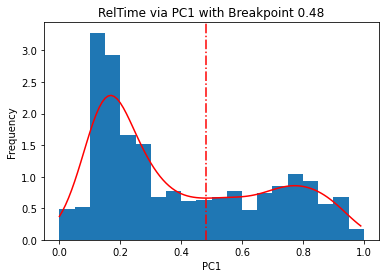

Rescaled Breakpoint [5.16507945]


In [14]:
plt.hist(Data2["SPC"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE2 = gaussian_kde(Data2["SPC"])(x)

#KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
KDE_min2 = np.min(KDE2[35:65])  # find the minimum in the centre


xmin2 = x[KDE2 == KDE_min2] # x-position of the minimum
plt.plot(x, KDE2, c="red")
plt.axvline(xmin2, linestyle="-.",c="red", )
plt.title("RelTime via PC1 with Breakpoint "+str(np.round(xmin2[0],2)))
plt.xlabel("PC1")
plt.ylabel("Frequency")
plt.show()

PC_Break2 = xmin2

print("Rescaled Breakpoint",PC_Break2 * (Maximum2-Minimum2)  + Minimum2)


In [15]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []
SmallNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["PC1"]) > PC_Break # Is this polity large enough to cross the PC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    else:
        SmallNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

35
Is Ghanaian Coast large enough? [ True]
Is Sogdiana large enough? [ True]
Is Southern Mesopotamia large enough? [ True]
Is Galilee large enough? [ True]
Is Middle Yellow River Valley large enough? [ True]
Is Finger Lakes large enough? [False]
Is Yemeni Coastal Plain large enough? [ True]
Is North Colombia large enough? [False]
Is Chuuk Islands large enough? [False]
Is Upper Egypt large enough? [ True]
Is Kachi Plain large enough? [ True]
Is Southern China Hills large enough? [False]
Is Susiana large enough? [ True]
Is Kapuasi Basin large enough? [False]
Is Central Java large enough? [ True]
Is Oro PNG large enough? [False]
Is Lowland Andes large enough? [False]
Is Basin of Mexico large enough? [ True]
Is Orkhon Valley large enough? [ True]
Is Latium large enough? [ True]
Is Middle Ganga large enough? [ True]
Is Paris Basin large enough? [ True]
Is Iceland large enough? [False]
Is Konya Plain large enough? [ True]
Is Niger Inland Delta large enough? [ True]
Is Cuzco large enough? [ T

In [16]:
Old_Large = ['Paris Basin', 'Kansai', 'Deccan', 'Susiana', 'Latium', 'Cuzco', 'Orkhon Valley',
             'Central Java', 'Ghanaian Coast', 'Konya Plain', 'Niger Inland Delta', 'Kachi Plain', 
             'Iceland', 'Cambodian Basin', 'Upper Egypt', 'Middle Yellow River Valley', 'Yemeni Coastal Plain',
             'Sogdiana']


for nga in Old_Large:
    print(nga, nga in LargeNGAs)
    
print("New:")
for nga in LargeNGAs:
    if nga not in Old_Large:
        print(nga)

Paris Basin True
Kansai True
Deccan True
Susiana True
Latium True
Cuzco True
Orkhon Valley True
Central Java True
Ghanaian Coast True
Konya Plain True
Niger Inland Delta True
Kachi Plain True
Iceland False
Cambodian Basin True
Upper Egypt True
Middle Yellow River Valley True
Yemeni Coastal Plain True
Sogdiana True
New:
Southern Mesopotamia
Galilee
Basin of Mexico
Middle Ganga
Valley of Oaxaca
Crete


## Find their RelTimes

In [17]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA].copy()
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["PC1"]> PC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "PC1"]])
    print(" ________________________ ")

                       NGA    PolID  Time       PC1 Culture.Cont Polity.Cont  \
0          Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   
1          Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   
2          Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   
3          Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   
4          Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   
...                    ...      ...   ...       ...          ...         ...   
1391  Yemeni Coastal Plain  YeRasul  1400  0.730293          NaN         NaN   
1392  Yemeni Coastal Plain  YeTahir  1500  0.735025          NaN         NaN   
1393  Yemeni Coastal Plain  TrOttm3  1600  0.976995          NaN         NaN   
1394  Yemeni Coastal Plain  YeQasmi  1700  0.591981          NaN         NaN   
1395  Yemeni Coastal Plain  YeQasmi  1800  0.591981          NaN         NaN   

     Notes  
0      NaN  
1      NaN  


     Time       PC1
866 -1200  0.098701
867 -1100  0.098701
868 -1000  0.098701
869  -900  0.205307
870  -800  0.205307
871  -700  0.205307
872  -600  0.280854
873  -500  0.280854
874  -400  0.280854
875  -300  0.280854
876  -200  0.280854
877  -100  0.380872
878     0  0.550826
879   100  0.639286
880   200  0.639286
881   300  0.699253
882   400  0.699253
883   500  0.743343
884   600  0.761605
885   700  0.397654
886   800  0.644093
 ________________________ 
Cuzco 700
     Time       PC1
253  -600  0.250616
254  -500  0.212279
255  -400  0.212279
256  -300  0.219206
257  -200  0.211525
258  -100  0.211525
259     0  0.485338
260   100  0.485338
261   200  0.485338
262   300  0.291230
263   400  0.291230
264   500  0.291230
265   600  0.405007
266   700  0.612745
267   800  0.625565
268   900  0.937211
269  1000  0.934620
 ________________________ 
Valley of Oaxaca 1600
      Time       PC1
1310 -3000  0.052452
1311 -2900  0.052452
1312 -2800  0.052452
1313 -2700  0.106401
1314 -260

In [18]:
NGA_dat

,NGA,PolID,Time,PC1,Culture.Cont,Polity.Cont,Notes
164,Crete,GrCrNeo,-5300,0.044584,NaN,NaN,NaN
165,Crete,GrCrNeo,-5200,0.044584,NaN,NaN,NaN
166,Crete,GrCrNeo,-5100,0.044584,NaN,NaN,NaN
167,Crete,GrCrNeo,-5000,0.044584,NaN,NaN,NaN
168,Crete,GrCrNeo,-4900,0.044584,NaN,NaN,NaN
...,...,...,...,...,...,...,...
248,Crete,ItVenR3,3100,0.845300,NaN,NaN,NaN
249,Crete,ItVenR3,3200,0.845300,NaN,NaN,NaN
250,Crete,ItVenR4,3300,0.818920,NaN,NaN,NaN
251,Crete,TrOttm4,3400,0.930379,NaN,NaN,NaN


In [19]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("NEW_TimeZero.csv")
DF_Tzero.transpose(), DF_Tzero.head(23)

(NGA Ghanaian Coast Sogdiana Southern Mesopotamia Galilee  \
 T0            1800     -500                -2900   -2000   
 
 NGA Middle Yellow River Valley Yemeni Coastal Plain Upper Egypt Kachi Plain  \
 T0                       -1600                  200       -3100       -2500   
 
 NGA Susiana Central Java  ... Middle Ganga Paris Basin Konya Plain  \
 T0    -3100          800  ...         -600        -100       -2000   
 
 NGA Niger Inland Delta Cuzco Valley of Oaxaca Kansai Deccan Cambodian Basin  \
 T0                1000   700             1600    300   -300             300   
 
 NGA  Crete  
 T0   -1700  
 
 [1 rows x 23 columns],
                                T0
 NGA                              
 Ghanaian Coast               1800
 Sogdiana                     -500
 Southern Mesopotamia        -2900
 Galilee                     -2000
 Middle Yellow River Valley  -1600
 Yemeni Coastal Plain          200
 Upper Egypt                 -3100
 Kachi Plain                 -2500
 Sus

In [20]:
Data_RT = Data_RT.rename(columns={'Time':'RelTime'})

Data_RT.head()

,NGA,PolID,RelTime,PC1,Culture.Cont,Polity.Cont,Notes
344,Ghanaian Coast,GhAshnE,-200,0.408044,StartSeq,StartSeq,NaN
345,Ghanaian Coast,GhAshnE,-100,0.408044,continuity,continuity,NaN
346,Ghanaian Coast,GhAshnL,0,0.573746,continuity,continuity,NaN
986,Sogdiana,TjSaraz,-3000,0.304425,NaN,NaN,NaN
987,Sogdiana,TjSaraz,-2900,0.304425,NaN,NaN,NaN


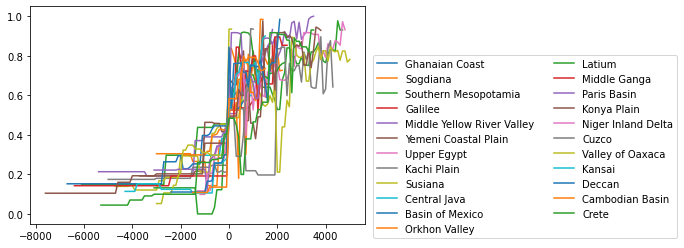

In [21]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["PC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

#### Now the same with SPC1Dat.Relation_Pol_Culture

## Fitting

In [22]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data


(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

[0.6414222  0.15295979 8.10204878 0.00981527]
0.6414221973086696 0.15295979307387209 8.10204877962643 0.00981526530042862
-1.52 1.1800000000000024


In [23]:
max(x_show*T)

5900.000000000012

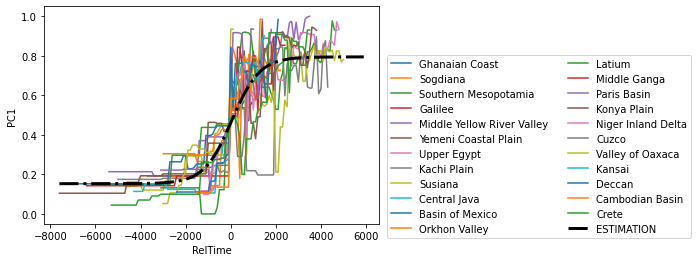

In [24]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["PC1"], label=N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("PC1")
plt.xlabel("RelTime")
plt.show()

##### multiplot of the NGAs


In [25]:
def SpaceToLinebreak(String):
    Stringout = ""
    for i in range(len(String)):
        if String[i] ==" " and i>7:
            Stringout += "\n"
        else:
            Stringout += String[i]
    return(Stringout)


In [26]:
Name2 = "Basin of"
SpaceToLinebreak(Name2)

'Basin of'

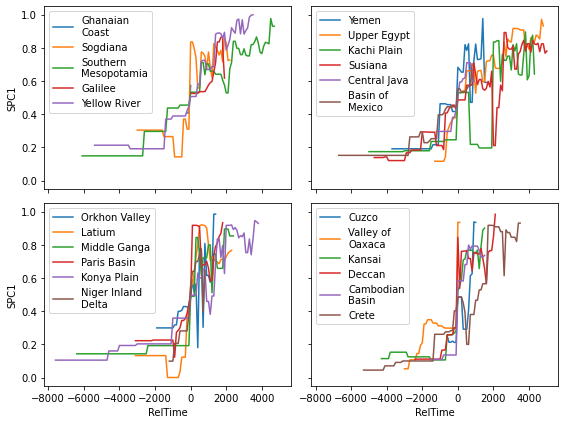

In [27]:
fig, ax = plt.subplots(2, 2, figsize = (8,6), sharey = True, sharex = True)
#fig.suptitle('Horizontally stacked subplots')

nga_number = 1
axis = 0


for N in list(set(Data_RT["NGA"])):
    
    
    i = int(axis/2) 
    j = axis%2
    #print(i,j)
    AX = ax[i,j]
    
    DF = Data_RT[Data_RT["NGA"] == N]
    
    Name = N
    if N == "Middle Yellow River Valley":
        Name = "Yellow River"
    elif N == "Yemeni Coastal Plain":
        Name = "Yemen"
    
    AX.plot(DF["RelTime"],    # ALSO normalised
             DF["PC1"], label=SpaceToLinebreak(Name))
    nga_number += 1
    
    if axis != int(nga_number*4/24): # switch to next quarter of plot
        AX.legend()
        axis = int(nga_number*4/24)
    #print(axis)
    
    
ax[1,0].set_xlabel("RelTime")  
ax[1,1].set_xlabel("RelTime")   
 
ax[0,0].set_ylabel("SPC1")   
ax[1,0].set_ylabel("SPC1") 
plt.tight_layout()
plt.savefig("MultiplotOfTimeSeries.pdf", dpi = 200, bbox_inches="tight")

plt.show()


#### Residuals


RMSE 0.11796339685051084
RhoSquared 0.7742861681210577


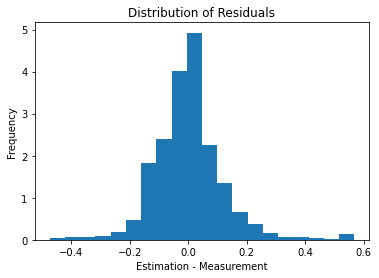

In [28]:
y_est = f(X,a_, b_, c_, d_)
y_est_Residuals = y_est
y_Residuals = y


RMSE = (np.sum((y_est_Residuals-y_Residuals)**2) / len(y)  )**0.5
print("RMSE",RMSE)


print("RhoSquared",RhoSq(y_hat = y_Residuals,
           y_true = y_est_Residuals))

plt.hist(y_est_Residuals-y_Residuals,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

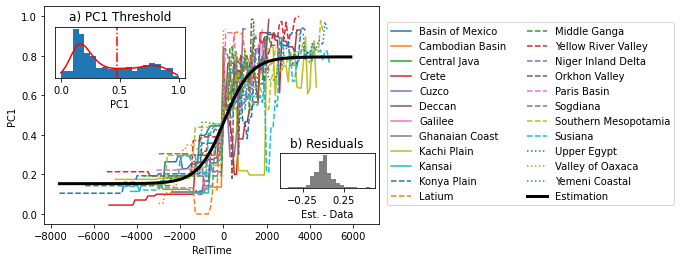

In [29]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.63, 0.3, 0.18]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.67, 0.25, 0.22, 0.12] #[0.25, 0.35, 0.2, 0.08]#
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
#ax1.scatter([-15000,6500], [0.0,1.0], c="white") 
ax1.scatter([-5000,6500], [0.0,1.0], c="white")
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("PC1")
ax1.set_xlabel("RelTime")


ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) PC1 Threshold")
ax2.set_xlabel("PC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals")#": Est. - Data")
ax3.set_xlabel("Est. - Data")
ax3.set_xticks([-0.25,0.25])
ax3.axes.get_yaxis().set_visible(False)

#plt.savefig("NEW_Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

# Bootstrapping of Full Data

In [30]:
np.random.seed(4321)
random.seed(4321)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters
NGA_list = list(set(Data_RT["NGA"]))


for i in range(nBT):
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Data_RT.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_RT.query("NGA== @n")])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0, maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF_N = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF_N["PC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
    if i%25==0:    
        print(i,a_, b_, c_, d_)
    #print("-----------------")
#print(Params.round(2))

0 0.6224993858107287 0.17686591879727367 10.435965727792976 0.0035867426562767764
25 0.5442870098637405 0.17202853157679918 13.195969220779787 -0.01120127521108355
50 0.6663789403386816 0.1448097012164121 7.122983347157512 0.027846292788743135
75 0.6589841101026218 0.1439987521620634 6.820061402726067 0.011400823473510105
100 0.6873555497641789 0.1355194171197269 4.515979361565794 0.05448829777210651
125 0.6762932637289031 0.14187206132800428 6.644541922465962 0.021786119344953458
150 0.5528094767689359 0.16770992102783228 11.025139815566716 -0.018147856229488352
175 0.6155381443351307 0.14863955526877534 11.28660484314013 -0.001213661191023077
200 0.6529746651489953 0.1494775249230762 7.878743711989766 0.034248954639861606
225 0.5794131721255248 0.15336150721310005 7.827589434441489 0.017336202658540866
250 0.6605241065581681 0.1355284261000657 6.6455015580457815 0.01912083155299676
275 0.6405718391961359 0.1405077006365418 6.770729298028777 0.005280865150544677
300 0.561606590547909 

In [31]:
print("p0", np.round(p0,2))

print(Params.round(2))
i=0
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    print("Parameter", P)
    print("Mean", np.mean(Ps), " and Median", np.median(Ps), "p0", p0[i])
    print("StandardDev",np.std(Ps))
    print("50% centred quantiles", np.quantile(Ps, 0.25), 
          np.quantile(Ps, 0.75))
    print("90% centred quantiles", np.quantile(Ps, 0.05), 
          np.quantile(Ps, 0.95))
    print("\n")
    i+=1
    #plt.hist(Ps,bins=20, density= True)
    #plt.plot(P_range, KDE, c="k")
    #plt.title("Parameter "+str(P))
    #plt.show()

p0 [0.64 0.15 8.1  0.01]
       a     b      c     d
0   0.62  0.18  10.44  0.00
0   0.68  0.14   6.08  0.01
0   0.58  0.18  15.39 -0.01
0   0.64  0.15   8.28  0.01
0   0.62  0.17   6.84 -0.00
..   ...   ...    ...   ...
0   0.60  0.17  13.86 -0.00
0   0.64  0.17   7.10  0.01
0   0.68  0.15   6.80  0.04
0   0.62  0.15  11.88  0.00
0   0.54  0.16  14.48 -0.02

[1000 rows x 4 columns]
Parameter a
Mean 0.641035925617301  and Median 0.644748863462595 p0 0.6414221973086696
StandardDev 0.04947000846021777
50% centred quantiles 0.6083137573259526 0.676419150815743
90% centred quantiles 0.5541305362378214 0.7155666436528891


Parameter b
Mean 0.15349756574010215  and Median 0.1527850314928853 p0 0.15295979307387209
StandardDev 0.015786917811172644
50% centred quantiles 0.1420812612685039 0.163784591437339
90% centred quantiles 0.1298901228755375 0.17993642922103248


Parameter c
Mean 9.581083915995542  and Median 8.12263272654229 p0 8.10204877962643
StandardDev 5.8370420836100605
50% centred q

In [32]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))


0.15349756574010215 0.015786917811172644
0.7945334913574026 0.03827449021176354


In [33]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Q1 = 0.84 # 1-1sigma
Q2 = 0.16 # 1sigma
#Thresh1 = np.quantile(Params["b"], Q1) #np.quantile(Params["b"], ) + np.std(Params["b"])
#Thresh2 = np.quantile(Params["b"]+Params["a"], Q2)#np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
Thresh1 = np.mean(Params["b"]) + 3*np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - 3*np.std(Params["b"]+Params["a"])
print("Trhesholds",Thresh1, Thresh2)

def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

print("T1, T2", T1, T)
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

0.15349756574010215 0.015786917811172644
0.7945334913574026 0.03827449021176354
Trhesholds 0.20085831917362007 0.679710020722112
T1, T2     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([3.00381942e-12])
       r: array([-0.3590963])
  status: 1
 success: True
       x: array([-0.30084596]) 5000
Most of the cultural evolution takes place in a time interval of  2494.0 years.


In [34]:
Thresh1, Thresh2

(0.20085831917362007, 0.679710020722112)

In [35]:
Thresh1_1sigma = np.mean(Params["b"]) + 1*np.std(Params["b"])
Thresh2_1sigma = np.mean(Params["b"]+Params["a"]) - 1*np.std(Params["b"]+Params["a"])

def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1_1sigma)

def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2_1sigma)


T1_1sigma = opt.root(f1, -0.5)
T2_1sigma = opt.root(f2, 0.5)

C:\Users\Tobias\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


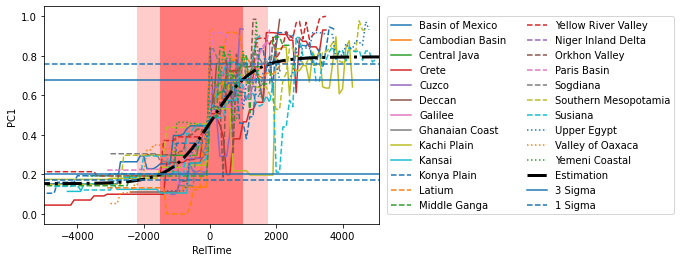

In [36]:

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
plt.scatter([-15000,6500], [0.0,1.0], c="white")    
plt.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
plt.ylabel("PC1")
plt.xlabel("RelTime")

T1_scaled, T2_scaled = T*t_1, T*t_2
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T*T1_1sigma["x"], T*T2_1sigma["x"], facecolor='r', alpha=0.2)

plt.axhline(Thresh1, label="3 Sigma")
plt.axhline(Thresh2)

plt.axhline(Thresh1_1sigma,linestyle = "--", label="1 Sigma")
plt.axhline(Thresh2_1sigma,linestyle = "--")

plt.xlim(-5000,5099)

lgd = plt.legend(ncol = 2,
                bbox_to_anchor=[1.01, 0.5], loc='center left')#bbox_to_anchor=(1.01, 0.95), ncol=2)

plt.savefig("VariousSigmas.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [37]:
T*T1_1sigma["x"][0], T*T2_1sigma["x"][0]

(-2200.4959932290026, 1753.3340122370896)

In [38]:
T2_scaled - T1_scaled, T2_1sigma.x*T - T*T1_1sigma.x

(array([2494.21062739]), array([3953.83000547]))

In [39]:
Thresh1, Thresh1_1sigma

(0.20085831917362007, 0.1692844835512748)

In [40]:
T1_scaled, T2_scaled

(array([-1504.22977682]), array([989.98085056]))

In [41]:
T*T1_1sigma["x"], T*T2_1sigma["x"]

(array([-2200.49599323]), array([1753.33401224]))

#### How much time does each NGA take to cross the thresholds?


In [42]:
Thresh1, Thresh2# SPC thresholds

Durations = dict()

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    
    if DF.query("PC1 > @Thresh2").shape[0] > 0:
        T1_N = DF.query("PC1 > @Thresh1").RelTime.to_list()[0]
        T2_N = DF.query("PC1 > @Thresh2").RelTime.to_list()[0]
        Durations[N] = T2_N -T1_N
    
    
    
    
    #print("\n")

In [43]:
durations_np = np.fromiter(Durations.values(), dtype=float)
np.mean(durations_np), np.median(durations_np), np.std(durations_np)

(2236.3636363636365, 2100.0, 1406.0083584859058)

In [116]:
sum(durations_np > 1000)

17

In [112]:
((durations_np > 2500  ) | (durations_np < 2500))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [44]:
Durations

{'Basin of Mexico': 3500,
 'Cambodian Basin': 400,
 'Central Java': 1700,
 'Crete': 3000,
 'Cuzco': 1500,
 'Deccan': 600,
 'Galilee': 1400,
 'Kachi Plain': 3500,
 'Kansai': 900,
 'Konya Plain': 4400,
 'Latium': 500,
 'Middle Ganga': 300,
 'Middle Yellow River Valley': 6000,
 'Niger Inland Delta': 1200,
 'Orkhon Valley': 2400,
 'Paris Basin': 3200,
 'Sogdiana': 3000,
 'Southern Mesopotamia': 3200,
 'Susiana': 2900,
 'Upper Egypt': 2200,
 'Valley of Oaxaca': 2000,
 'Yemeni Coastal Plain': 1400}

## Out-of-Sample Prediction

In [45]:
L = len(Data_RT["RelTime"].to_numpy())

X1, y1 = Data_RT["RelTime"].to_numpy(), Data_RT["PC1"].to_numpy()
T = 5000
X1 = np.array(list(X1)) # for some reason, this transformation is necessary
X1 = X1/T # normalisation of the data

OutOfSample_Eval = list()

for i in range(100):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X1[Selection]
    y_train = y1[Selection]
    
    test_indx = np.ones(len(X1), bool)
    test_indx[Selection]=0
    y_test = y1[test_indx]
    X_test = X1[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train)
    #print((a1_, b1_, c1_, d1_))
    OutOfSample_Eval += [RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test)] 
    
OutOfSample_Eval = np.array(OutOfSample_Eval)
print("Accuracy of Out-Of-Sample Prediction is")
print(np.mean(OutOfSample_Eval),"±",np.std(OutOfSample_Eval))

Accuracy of Out-Of-Sample Prediction is
0.8133160282841483 ± 0.014601248344083054


# Now the Snippets

In [46]:
#print(DF_Tzero)
OLD_DF_Tzero = pd.read_csv("TimeZero.csv", index_col = 0)
#print(OLD_DF_Tzero)

DF_Comparison = pd.DataFrame(index = ["OldData", "NewData"])

for nga in DF_Tzero.index:
    
    if nga in OLD_DF_Tzero.columns:
        #print(nga)
        #print(DF_Tzero.loc[nga].T0)
        #print(OLD_DF_Tzero[nga].T0)
        #print("\n")
        
        DF_Comparison[nga] = pd.Series({"OldData": OLD_DF_Tzero[nga].T0,
                                       "NewData": DF_Tzero.loc[nga].T0})
        
    else:
        DF_Comparison[nga] = pd.Series({"OldData": np.nan,
                                       "NewData": DF_Tzero.loc[nga].T0})
DF_Comparison = DF_Comparison.transpose().sort_index() 
DF_Comparison.head()       
DF_Comparison.to_csv("Compare_Anchor_Times.csv",index= True)

In [47]:
DF_Comparison

,OldData,NewData
Basin of Mexico,NaN,700.0
Cambodian Basin,300.0,300.0
Central Java,800.0,800.0
Crete,NaN,-1700.0
Cuzco,1400.0,700.0
Deccan,-300.0,-300.0
Galilee,NaN,-2000.0
Ghanaian Coast,1800.0,1800.0
Kachi Plain,-2500.0,-2500.0
Kansai,400.0,300.0


Basin of Mexico 8 100.0
Cambodian Basin 13 300.0
Central Java 5 800.0
Crete 10 -1000.0
Cuzco 2 1400.0
Deccan 1 -300.0
Galilee 9 -2000.0
Ghanaian Coast 3 1600.0
Kachi Plain 22 -4000.0
Kansai 5 300.0
Konya Plain 17 -3000.0
Latium 12 -700.0
Middle Ganga 3 -600.0
Middle Yellow River Valley 38 -5000.0
Niger Inland Delta 3 1000.0
Orkhon Valley 4 600.0
Paris Basin 10 -1000.0
Sogdiana 2 -500.0
Southern Mesopotamia 19 -4200.0
Susiana 21 -4300.0
Upper Egypt 33 -3800.0
Valley of Oaxaca 2 1600.0
Yemeni Coastal Plain 3 900.0

# Snippets for Cultural Continuity (1st continuity)

In [48]:
#Snippets_DF = pd.read_csv("SPC1Dat.Relation.Continuity.csv", index_col=False)
Snippets_DF = pd.read_excel("SPC1_Final.xlsx")
Snippets_DF = Snippets_DF.fillna("no")
Snippets_DF = Snippets_DF.rename({"Culture.Cont":"Culture_Cont"}, axis = 1)
del Snippets_DF["Notes"]
print(Snippets_DF.head())


               NGA    PolID  Time RelTime       SPC Culture_Cont Polity.Cont
0  Basin of Mexico  MxArch* -6000      no  3.210005           no          no
1  Basin of Mexico  MxArch* -5900      no  3.210005           no          no
2  Basin of Mexico  MxArch* -5800      no  3.210005           no          no
3  Basin of Mexico  MxArch* -5700      no  3.210005           no          no
4  Basin of Mexico  MxArch* -5600      no  3.210005           no          no


In [49]:
continuous = set(("StartSeq", "continuity"))
Snippets_DF = Snippets_DF.query("Culture_Cont in @continuous")
Snippets_DF = Snippets_DF.reset_index(drop = True)
Snippets_DF

,NGA,PolID,Time,RelTime,SPC,Culture_Cont,Polity.Cont
0,Basin of Mexico,MxClass,100,-600.0,4.958509,StartSeq,StartSeq
1,Basin of Mexico,MxClass,200,-500.0,4.958509,continuity,continuity
2,Basin of Mexico,MxClass,300,-400.0,4.958509,continuity,continuity
3,Basin of Mexico,MxClass,400,-300.0,4.958509,continuity,continuity
4,Basin of Mexico,MxClass,500,-200.0,4.958509,continuity,continuity
...,...,...,...,...,...,...,...
277,Valley of Oaxaca,EsHabsb,1700,100.0,7.878041,continuity,continuity
278,Yemeni Coastal Plain,EtAksm1,200,0.0,6.375543,StartSeq,StartSeq
279,Yemeni Coastal Plain,YeZiyad,900,-200.0,5.115125,StartSeq,no
280,Yemeni Coastal Plain,YeZiyad,1000,-100.0,5.115125,continuity,no


In [50]:
len(set(Snippets_DF.NGA))

23

## Manual Discarding:

- Delete Yemeni at time 200: would be just one observation
- Discard second start sequence Susiana
- Discard 2nd sequence in Konya

In [51]:
print(Snippets_DF.query("NGA == 'Yemeni Coastal Plain'"))
print(Snippets_DF.query("NGA == 'Susiana'"))
print(Snippets_DF.query("NGA == 'Konya Plain'"))

                      NGA    PolID  Time RelTime       SPC Culture_Cont  \
278  Yemeni Coastal Plain  EtAksm1   200     0.0  6.375543     StartSeq   
279  Yemeni Coastal Plain  YeZiyad   900  -200.0  5.115125     StartSeq   
280  Yemeni Coastal Plain  YeZiyad  1000  -100.0  5.115125   continuity   
281  Yemeni Coastal Plain  YeWarLd  1100     0.0  6.621210   continuity   

    Polity.Cont  
278    StartSeq  
279          no  
280          no  
281          no  
         NGA    PolID  Time RelTime       SPC Culture_Cont Polity.Cont
212  Susiana  IrSusa1 -4300 -1200.0  3.563953     StartSeq    StartSeq
213  Susiana  IrSusa1 -4200 -1100.0  3.563953   continuity  continuity
214  Susiana  IrSusa1 -4100 -1000.0  3.563953   continuity  continuity
215  Susiana  IrSusa1 -4000  -900.0  3.563953   continuity  continuity
216  Susiana  IrSusa1 -3900  -800.0  3.415358   continuity  continuity
217  Susiana  IrSusa2 -3800  -700.0  4.730370   continuity  continuity
218  Susiana  IrSusa2 -3700  -600.0  

In [52]:
Snippets_DF = Snippets_DF.drop(labels = [278], axis = 0) # Yemen
Snippets_DF = Snippets_DF.drop(labels = np.arange(233, 243), axis = 0) # Susiana
Snippets_DF = Snippets_DF.drop(labels = [103,104], axis = 0) # Konya

### Check if discarding worked out correctly

In [53]:
print(Snippets_DF.query("NGA == 'Yemeni Coastal Plain'"))
print(Snippets_DF.query("NGA == 'Susiana'"))
print(Snippets_DF.query("NGA == 'Konya Plain'"))

                      NGA    PolID  Time RelTime       SPC Culture_Cont  \
279  Yemeni Coastal Plain  YeZiyad   900  -200.0  5.115125     StartSeq   
280  Yemeni Coastal Plain  YeZiyad  1000  -100.0  5.115125   continuity   
281  Yemeni Coastal Plain  YeWarLd  1100     0.0  6.621210   continuity   

    Polity.Cont  
279          no  
280          no  
281          no  
         NGA    PolID  Time RelTime       SPC Culture_Cont Polity.Cont
212  Susiana  IrSusa1 -4300 -1200.0  3.563953     StartSeq    StartSeq
213  Susiana  IrSusa1 -4200 -1100.0  3.563953   continuity  continuity
214  Susiana  IrSusa1 -4100 -1000.0  3.563953   continuity  continuity
215  Susiana  IrSusa1 -4000  -900.0  3.563953   continuity  continuity
216  Susiana  IrSusa1 -3900  -800.0  3.415358   continuity  continuity
217  Susiana  IrSusa2 -3800  -700.0  4.730370   continuity  continuity
218  Susiana  IrSusa2 -3700  -600.0  4.739691   continuity  continuity
219  Susiana  IrSusa2 -3600  -500.0  4.881445   continuity 

Ghanaian Coast (3, 8)
Sogdiana (2, 8)
Southern Mesopotamia (19, 8)
Galilee (9, 8)
Middle Yellow River Valley (38, 8)
Yemeni Coastal Plain (3, 8)
Upper Egypt (33, 8)
Kachi Plain (22, 8)
Susiana (21, 8)
Central Java (5, 8)
Basin of Mexico (8, 8)
Orkhon Valley (20, 8)
Latium (12, 8)
Middle Ganga (3, 8)
Paris Basin (10, 8)
Konya Plain (17, 8)
Niger Inland Delta (3, 8)
Cuzco (3, 8)
Valley of Oaxaca (2, 8)
Kansai (5, 8)
Deccan (1, 8)
Cambodian Basin (13, 8)
Crete (17, 8)


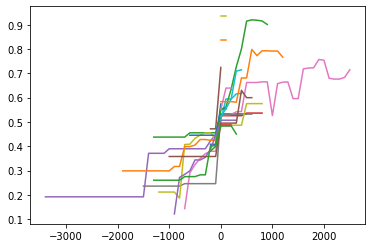

In [54]:
Snippets_DF = Snippets_DF.reset_index(drop = True)

Snippets_DF["PC1"] = (Snippets_DF.SPC - Minimum)/(Maximum-Minimum)

for n in set(sorted(Snippets_DF.NGA)):
    
    Snippet_n = Snippets_DF.query("NGA == @n")
    print(n, Snippet_n.shape)
    plt.plot(Snippet_n.RelTime, Snippet_n.PC1, label = n)
#plt.legend()
plt.show()

## Now the snippets for political continuity

In [55]:
#Snippets_DF = pd.read_csv("SPC1Dat.Relation.Continuity.csv", index_col=False)
Snippets_Pol_DF = pd.read_excel("SPC1_Final.xlsx")
Snippets_Pol_DF = Snippets_Pol_DF.fillna("no")
Snippets_Pol_DF = Snippets_Pol_DF.rename({"Polity.Cont":"Polity_Cont"}, axis = 1)
del Snippets_Pol_DF["Notes"]
print(Snippets_Pol_DF.head())


continuous = set(("StartSeq", "continuity"))
Snippets_Pol_DF = Snippets_Pol_DF.query("Polity_Cont in @continuous")
Snippets_Pol_DF = Snippets_Pol_DF.reset_index(drop = True)
Snippets_Pol_DF

               NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
0  Basin of Mexico  MxArch* -6000      no  3.210005           no          no
1  Basin of Mexico  MxArch* -5900      no  3.210005           no          no
2  Basin of Mexico  MxArch* -5800      no  3.210005           no          no
3  Basin of Mexico  MxArch* -5700      no  3.210005           no          no
4  Basin of Mexico  MxArch* -5600      no  3.210005           no          no


,NGA,PolID,Time,RelTime,SPC,Culture.Cont,Polity_Cont
0,Basin of Mexico,MxClass,100,-600.0,4.958509,StartSeq,StartSeq
1,Basin of Mexico,MxClass,200,-500.0,4.958509,continuity,continuity
2,Basin of Mexico,MxClass,300,-400.0,4.958509,continuity,continuity
3,Basin of Mexico,MxClass,400,-300.0,4.958509,continuity,continuity
4,Basin of Mexico,MxClass,500,-200.0,4.958509,continuity,continuity
...,...,...,...,...,...,...,...
133,Upper Egypt,EgOldK2,-2300,800.0,6.268058,continuity,continuity
134,Upper Egypt,EgOldK2,-2200,900.0,6.268058,continuity,continuity
135,Valley of Oaxaca,EsHabsb,1600,0.0,7.878041,StartSeq,StartSeq
136,Valley of Oaxaca,EsHabsb,1700,100.0,7.878041,continuity,continuity


In [56]:


for n in set(Snippets_Pol_DF.NGA):
    
    print(Snippets_Pol_DF.query("NGA == @n"))
    print("\n")

               NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
45  Ghanaian Coast  GhAshnE  1600  -200.0  4.735678     StartSeq    StartSeq
46  Ghanaian Coast  GhAshnE  1700  -100.0  4.735678   continuity  continuity
47  Ghanaian Coast  GhAshnL  1800     0.0  5.724511   continuity  continuity


         NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
96  Sogdiana  IrAchae  -500     0.0  7.286842     StartSeq    StartSeq
97  Sogdiana  IrAchae  -400   100.0  7.286842   continuity  continuity


                      NGA    PolID  Time RelTime      SPC Culture.Cont  \
98   Southern Mesopotamia  IqEDyn* -2900     0.0  5.48286   continuity   
99   Southern Mesopotamia  IqEDyn* -2800   100.0  5.48286   continuity   
100  Southern Mesopotamia  IqEDyn* -2700   200.0  5.48286   continuity   
101  Southern Mesopotamia  IqEDyn* -2600   300.0  5.48286   continuity   
102  Southern Mesopotamia  IqEDyn* -2500   400.0  5.48286   continuity   
103  Southern Mesopotamia  IqED

88  continuity  


      NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
32  Cuzco  PeWari*   700     0.0  5.196937     StartSeq    StartSeq
33  Cuzco  PeWari*   800   100.0  5.196937   continuity  continuity
34  Cuzco  PeWari*   900   200.0  5.196937   continuity  continuity


                  NGA    PolID  Time RelTime       SPC Culture.Cont  \
135  Valley of Oaxaca  EsHabsb  1600     0.0  7.878041     StartSeq   
136  Valley of Oaxaca  EsHabsb  1700   100.0  7.878041   continuity   

    Polity_Cont  
135    StartSeq  
136  continuity  


       NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
55  Kansai  JpKofun   300     0.0  5.413498     StartSeq    StartSeq
56  Kansai  JpKofun   400   100.0  5.611527   continuity  continuity
57  Kansai  JpKofun   500   200.0  5.844284   continuity  continuity


       NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
35  Deccan  InMaury  -300     0.0  7.335416     StartSeq    StartSeq


                NGA

#### Manual discarding

- the second Susiana sequence np.arange(121, 125)
- second Konya series [72,73]

In [57]:
Snippets_Pol_DF = Snippets_Pol_DF.drop(labels = np.arange(121,125), axis = 0) # Susiana
Snippets_Pol_DF = Snippets_Pol_DF.drop(labels = [72,32], axis = 0) # Konya

# Redo the Logistic Curve fit with the snippets

## Cultural Continuity

In [58]:
Snippets_DF["PC1"] = (Snippets_DF.SPC - Minimum)/(Maximum-Minimum)


X, y = Snippets_DF["RelTime"].to_numpy(), Snippets_DF["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data


(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0 = p0)  # Old starting guess

P0 = np.array((a_, b_, c_, d_))
np.set_printoptions(suppress=True)

print("Full data:",np.round(p0,3))
print("Snippets:",np.round(P0,3))

Full data: [0.641 0.153 8.102 0.01 ]
Snippets: [ 0.481  0.24  12.949 -0.017]


Basin of Mexico 8
Cambodian Basin 13
Central Java 5
Crete 17
Cuzco 3
Deccan 1
Galilee 9
Ghanaian Coast 3
Kachi Plain 22
Kansai 5
Konya Plain 17
Latium 12
Middle Ganga 3
Middle Yellow River Valley 38
Niger Inland Delta 3
Orkhon Valley 20
Paris Basin 10
Sogdiana 2
Southern Mesopotamia 19
Susiana 21
Upper Egypt 33
Valley of Oaxaca 2
Yemeni Coastal Plain 3


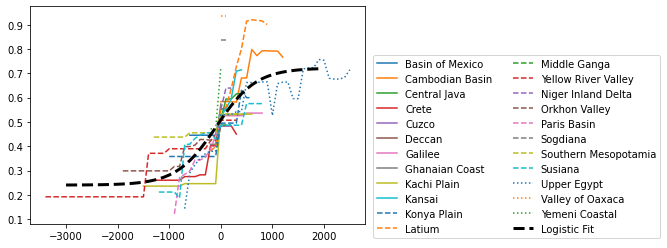

In [59]:
style = "-"
Snippet_Lengths = list()
for n in sorted(list(set(Snippets_DF["NGA"]))):
    name = n
    smalldf = Snippets_DF.loc[Snippets_DF["NGA"]==n]
 
    # some abbreviations
    if n=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if n == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(smalldf["RelTime"], smalldf["PC1"], style,label=name)
    print(n, smalldf.shape[0])
    Snippet_Lengths += [smalldf.shape[0]]
    
        
    # Change plotting style
    if n == "Kansai":
        style = "--"
    if n == "Susiana":
        style = ":"
TimeRange = np.arange(-3000,2000,100)
New_Fit = f(TimeRange/T, a_, b_, c_, d_)
plt.plot(TimeRange, New_Fit, "--",label="Logistic Fit", c="k", linewidth = 3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [60]:
np.mean(np.array(Snippet_Lengths))

11.695652173913043

### Polity

In [61]:
min(Snippets_Pol_DF.SPC - Minimum), max(Snippets_Pol_DF.SPC - Minimum),(Maximum-Minimum)

(1.1146989342580702, 5.5773821993567605, 5.967543007538761)

Full data: [0.641 0.153 8.102 0.01 ]
Snippets Culture: [ 0.481  0.24  12.949 -0.017]
Snippets Polity: [ 0.301  0.283 30.341 -0.049]
Basin of Mexico 8
Cambodian Basin 4
Central Java 3
Crete 17
Cuzco 2
Deccan 1
Galilee 9
Ghanaian Coast 3
Kachi Plain 7
Kansai 3
Konya Plain 15
Latium 5
Middle Ganga 3
Middle Yellow River Valley 4
Niger Inland Delta 3
Orkhon Valley 3
Paris Basin 4
Sogdiana 2
Southern Mesopotamia 6
Susiana 17
Upper Egypt 10
Valley of Oaxaca 2
Yemeni Coastal Plain 1


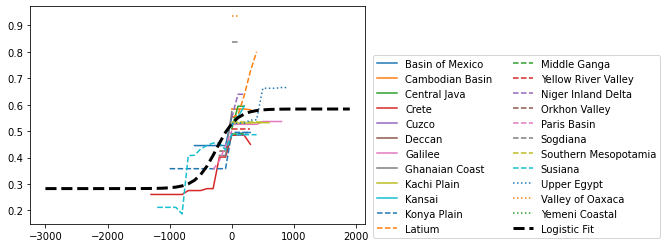

In [62]:
Snippets_Pol_DF["PC1"] = (Snippets_Pol_DF.SPC - Minimum)/(Maximum-Minimum)

Snippet_Pol_Lengths = list()

X, y = Snippets_Pol_DF["RelTime"].to_numpy(), Snippets_Pol_DF["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data


(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0 = p0)  # Old starting guess

P0_Polity = np.array((a_, b_, c_, d_))
np.set_printoptions(suppress=True)

print("Full data:",np.round(p0,3))
print("Snippets Culture:",np.round(P0,3))
print("Snippets Polity:", np.round(P0_Polity,3))

style = "-"

for n in sorted(list(set(Snippets_Pol_DF["NGA"]))):
    smalldf = Snippets_Pol_DF.loc[Snippets_Pol_DF["NGA"]==n]
    name = n
    
    # some abbreviations
    if n=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if n == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(smalldf["RelTime"], smalldf["PC1"], style, label=name)
    print(n, smalldf.shape[0])
    Snippet_Pol_Lengths += [smalldf.shape[0]]
    # Change plotting style
    if n == "Kansai":
        style = "--"
    if n == "Susiana":
        style = ":" 


TimeRange = np.arange(-3000,2000,100)
New_Fit = f(TimeRange/T, a_, b_, c_, d_)
plt.plot(TimeRange, New_Fit, "--",label="Logistic Fit", c="k", linewidth = 3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [63]:
np.mean(np.array(Snippet_Pol_Lengths))

5.739130434782608

# Attempt to Show the Results

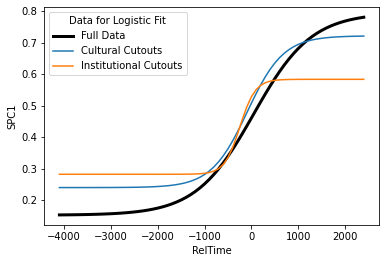

In [64]:

T_start = -4100
x_show = np.arange(T_start,2500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

plt.plot(x_show*T, y_hat, label="Full Data", c="k", linewidth=3)
plt.plot(x_show*T,f(x_show, P0[0], P0[1], P0[2], P0[3]), label="Cultural Cutouts" )
plt.plot(x_show*T, f(x_show, P0_Polity[0], P0_Polity[1], P0_Polity[2], P0_Polity[3]),
        label="Institutional Cutouts")
plt.xlabel("RelTime")
plt.ylabel("SPC1")
plt.legend(title="Data for Logistic Fit")

plt.show()

C:\Users\Tobias\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


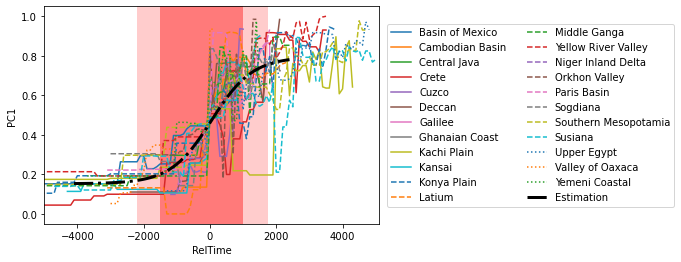

In [65]:

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    # Change plotting style
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
        
plt.scatter([-15000,6500], [0.0,1.0], c="white")    
plt.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
plt.ylabel("PC1")
plt.xlabel("RelTime")

T1_scaled, T2_scaled = T*t_1, T*t_2
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T*T1_1sigma["x"], T*T2_1sigma["x"], facecolor='r', alpha=0.2)

#plt.axhline(Thresh1, label="3 Sigma")
#plt.axhline(Thresh2)

#plt.axhline(Thresh1_1sigma,linestyle = "--", label="1 Sigma")
#plt.axhline(Thresh2_1sigma,linestyle = "--")

plt.xlim(-5000,5099)

lgd = plt.legend(ncol = 2,
                bbox_to_anchor=[1.01, 0.5], loc='center left')#bbox_to_anchor=(1.01, 0.95), ncol=2)

plt.savefig("VariousSigmas.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [66]:
T2_scaled - T1_scaled, T2_1sigma.x*T - T*T1_1sigma.x

(array([2494.21062739]), array([3953.83000547]))

In [67]:

print("Most of the cultural evolution takes place in a time interval of ", np.round((T2_scaled-T1_scaled)), "years.")

Most of the cultural evolution takes place in a time interval of  [2494.] years.


## Out-of-Sample prediction
To evaluate quality of the fit.

In [68]:
int(len(list(set(Snippets_DF.NGA)))/2)

11

In [69]:
Selection = np.random.choice(list(set(Snippets_DF.NGA)), 
                 size=int(len(list(set(Snippets_DF.NGA)))/2), 
                 replace = False)

print(Selection)

print(Snippets_DF.query("NGA in @Selection"))
print(Snippets_DF.query("NGA not in @Selection"))

['Cambodian Basin' 'Middle Ganga' 'Cuzco' 'Yemeni Coastal Plain'
 'Middle Yellow River Valley' 'Latium' 'Kansai' 'Konya Plain'
 'Central Java' 'Valley of Oaxaca' 'Orkhon Valley']
                      NGA    PolID  Time RelTime       SPC Culture_Cont  \
8         Cambodian Basin  KhFunaE   300     0.0  5.783213     StartSeq   
9         Cambodian Basin  KhFunaE   400   100.0  5.783213   continuity   
10        Cambodian Basin  KhFunaE   500   200.0  5.783213   continuity   
11        Cambodian Basin  KhFunaL   600   300.0  5.768527   continuity   
12        Cambodian Basin  KhChenl   700   400.0  6.363521   continuity   
..                    ...      ...   ...     ...       ...          ...   
264      Valley of Oaxaca  EsHabsb  1600     0.0  7.878041     StartSeq   
265      Valley of Oaxaca  EsHabsb  1700   100.0  7.878041   continuity   
266  Yemeni Coastal Plain  YeZiyad   900  -200.0  5.115125     StartSeq   
267  Yemeni Coastal Plain  YeZiyad  1000  -100.0  5.115125   continuity

##### Back to the culture continuity (else not enough data for estimates)

In [70]:
L = len(Snippets_DF["RelTime"].to_numpy())
X, y = Snippets_DF["RelTime"].to_numpy(), Snippets_DF["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

C_list = list()
RhoSqList = list()
n_split = 1000
for i in range(1000):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X[Selection]
    y_train = y[Selection]
    
    test_indx = np.ones(len(X), bool)
    test_indx[Selection]=0
    y_test = y[test_indx]
    X_test = X[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train,
                                            p0 = p0) # initial guess to ensure c > 0
    #print((a1_, b1_, c1_, d1_))
    C_list.append(c1_)
    RhoSqList.append(RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test))
    

In [71]:
print("Results of Out-of-sample prediction")
np.mean(RhoSqList), np.std(RhoSqList)

Results of Out-of-sample prediction


(0.7059717443705711, 0.030530937136138775)

## Bootstrapping

First round of bootstrap: estimate many parameter values for a and b and the standard deviations for a, b a+b. This allows to compute the thresholds of the plateaus.

In [72]:
np.random.seed(4321)
random.seed(4321)
nBT = 20 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters
NGA_list = list(set(Snippets_DF["NGA"]))


for i in range(nBT):
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Snippets_DF.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Snippets_DF.query("NGA== @n")])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0, maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["PC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    #print(a_, b_, c_, d_)
    #print("-----------------")
#print(Params.round(2))

In [73]:
print(Params.round(2))

for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    print("Parameter", P)
    print("Mean", np.mean(Ps), " and Median", np.median(Ps))
    print("50% centred quantiles", np.quantile(Ps, 0.25), 
          np.quantile(Ps, 0.75))
    print("90% centred quantiles", np.quantile(Ps, 0.05), 
          np.quantile(Ps, 0.95))
    print("\n")
    #plt.hist(Ps,bins=20, density= True)
    #plt.plot(P_range, KDE, c="k")
    #plt.title("Parameter "+str(P))
    #plt.show()

        a     b       c     d
0    0.53  0.19    9.20 -0.06
0  164.14  0.13    3.33  1.83
0    0.53  0.25   13.28 -0.02
0    0.43  0.25   19.99 -0.02
0    0.26  0.37  250.96 -0.01
0    0.41  0.26   30.12 -0.02
0    0.52  0.23   12.93 -0.04
0    0.56  0.20    9.15 -0.06
0    0.39  0.32   17.62  0.01
0  222.19  0.15    3.64  1.77
0    0.52  0.24   13.59 -0.00
0    0.46  0.23   15.94 -0.01
0    4.09  0.08    2.55  0.85
0    0.37  0.34   24.00  0.00
0    0.55  0.21    8.60 -0.02
0    0.48  0.23   10.71 -0.02
0    0.49  0.25   13.91 -0.01
0    0.42  0.31   21.07  0.01
0    0.98  0.19    6.48  0.12
0    0.56  0.20    7.84 -0.03
Parameter a
Mean 19.94343257842576  and Median 0.5180224786671919
50% centred quantiles 0.4291399891402199 0.5589039167066003
90% centred quantiles 0.36706811174760334 167.0416461389117


Parameter b
Mean 0.23107678682072205  and Median 0.23132974913224755
50% centred quantiles 0.19543843923006 0.25257648227812524
90% centred quantiles 0.13041899970597695 0.3381505464

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

Maybe this works better if we set d=0 (as indicated by the empirical quantiles)?

In [74]:
print(np.mean(Params["b"]), np.std(Params["b"]), np.median(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]),np.median(Params["b"]+Params["a"]))

0.23107678682072205 0.06710778261488945 0.23132974913224755
20.17450936524649 58.442282301866854 0.7398246795441535


In [75]:
quantile_a1 = np.quantile(Params["a"], 0.025)#
quantile_a2 = np.quantile(Params["a"], 0.975)


(Params["b"]+Params["a"]), Params[["a","b"]].query("a < @quantile_a2 & a > @quantile_a1 ").sum(axis =1).mean()


A_plus_B_df_quantile = Params[["a","b"]].query("a < @quantile_a2 & a > @quantile_a1 ").sum(axis =1)
A_plus_B_df_quantile.mean(), A_plus_B_df_quantile.std()

(10.028609663323369, 38.50254416056575)

In [76]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Q1 =  0.84 # 1-1sigma
Q2 =  0.16 # 1sigma
Thresh1 = np.quantile(Params["b"], Q1) #np.quantile(Params["b"], ) + np.std(Params["b"])
Thresh2 = np.quantile(Params["b"]+Params["a"], Q2)#np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)

def f1(x):
    # first threshold
    return(f(x, P0[0], P0[1], P0[2], P0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

def f2(x):
    # second threshold
    return(f(x, P0[0], P0[1], P0[2], P0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

print("T1, T2", T1, T)
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

0.23107678682072205 0.06710778261488945
20.17450936524649 58.442282301866854
0.30792245259714773 0.6911137663679305
T1, T2     fjac: array([[-1.]])
     fun: array([-0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([0.])
       r: array([-0.75133136])
  status: 1
 success: True
       x: array([-0.15749088]) 5000
Most of the cultural evolution takes place in a time interval of  1741.0 years.


## Bootstrapping the Time Interval

Now we can repeat this task, but 

-> Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

In [77]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


np.random.seed(1234)
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Snippets_DF.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Snippets_DF[Snippets_DF["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, P0,maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        #print(a_, b_, c_, d_, T1, T2)
        #print("-----------------")
print(Successes)
print(Params2.round(2))

C:\Users\Tobias\AppData\Local\Temp/ipykernel_1480/652433116.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


758
       a     b      c     d    T1    T2
0   0.71  0.22   9.22  0.05 -0.17  0.12
0   0.44  0.30  15.80  0.00 -0.24  0.14
0   0.45  0.24  11.84 -0.04 -0.19  0.32
0   0.47  0.25  14.56 -0.04 -0.18  0.15
0   0.47  0.25  18.24 -0.01 -0.12  0.13
..   ...   ...    ...   ...   ...   ...
0   0.48  0.23  14.96 -0.04 -0.15  0.20
0   0.46  0.25  14.85 -0.02 -0.15  0.20
0   0.49  0.25  14.78 -0.01 -0.14  0.14
0   0.76  0.19   6.58  0.05 -0.20  0.16
0   0.46  0.25  12.92 -0.02 -0.17  0.22

[758 rows x 6 columns]


In [78]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

TimeframeBT = Params2["T2"]-Params2["T1"]
print(np.mean(TimeframeBT))

# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
     u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

0.35426238295272056
Most of the cultural evolution takes place in a time interval of  1771.0 ± 460.0 years.


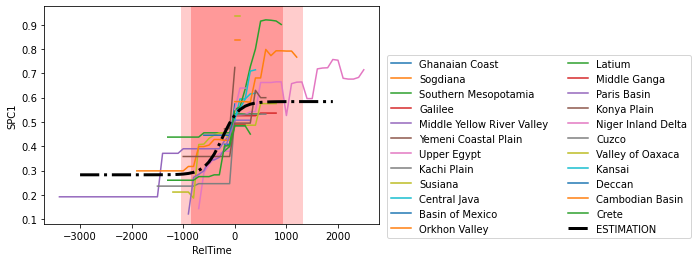

In [79]:
DF_Out_cutout = pd.DataFrame(columns=["NGA","RelTime","PC1"])

for N in list(set(Snippets_DF["NGA"])):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["PC1"], label=N)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    #print(N)
    
plt.plot(TimeRange, New_Fit, "-.",label="ESTIMATION", c = "k", linewidth=3)

plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped_no_Legend.pdf",dpi = 200, bbox_inches='tight')
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped",dpi = 200, bbox_inches='tight')
plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped.pdf",dpi = 200, bbox_inches='tight')
plt.show()

Basin of Mexico 8 100.0 800.0
Cambodian Basin 13 300.0 1500.0
Central Java 5 800.0 1200.0
Crete 17 -3000.0 -1400.0
Cuzco 3 700.0 900.0
Deccan 1 -300.0 -300.0
Galilee 9 -2000.0 -1200.0
Ghanaian Coast 3 1600.0 1800.0
Kachi Plain 22 -4000.0 -1900.0
Kansai 5 300.0 700.0
Konya Plain 17 -3000.0 -1400.0
Latium 12 -700.0 400.0
Middle Ganga 3 -600.0 -400.0
Middle Yellow River Valley 38 -5000.0 -1300.0
Niger Inland Delta 3 1000.0 1200.0
Orkhon Valley 20 -1400.0 500.0
Paris Basin 10 -1000.0 -100.0
Sogdiana 2 -500.0 -400.0
Southern Mesopotamia 19 -4200.0 -2400.0
Susiana 21 -4300.0 -2300.0
Upper Egypt 33 -3800.0 -600.0
Valley of Oaxaca 2 1600.0 1700.0
Yemeni Coastal Plain 3 900.0 1100.0


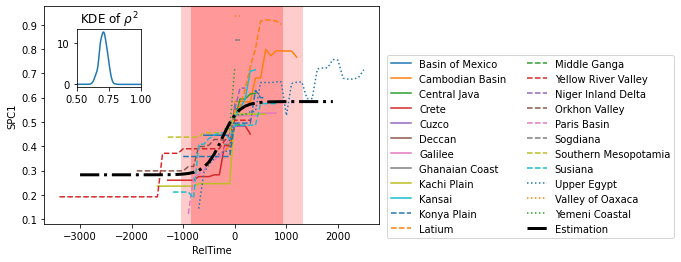

In [80]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.15, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
style ="-"

for N in sorted(list(set(Snippets_DF["NGA"]))):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]

      # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    elif N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
    else:
        name = N
        
    print(N, DF.shape[0], float(DF.head(1).Time), float(DF.tail(1).Time))
    #print(DF["RelTime"])
    ax1.plot(DF["RelTime"],   
             DF["PC1"], style,label=name)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    
ax1.plot(TimeRange, New_Fit, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

ax2.plot(np.arange(0.0,1,0.001),
    gaussian_kde(RhoSqList)(np.arange(0.0,1,0.001)))
ax2.set_title(r'KDE of $\rho^2$')
ax2.set_xlim([0.5,1.0])

plt.savefig("NEW_Cutout_Logistic_Times_Inset.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [81]:
DF.head(1).Time

266    900
Name: Time, dtype: int64

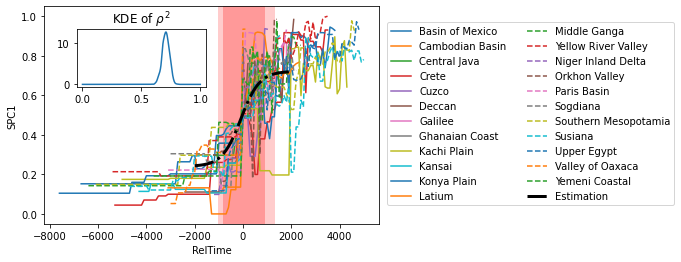

In [82]:

TimeRange = np.arange(-2000,2000,100)
New_Fit = f(TimeRange/T, P0[0], P0[1], P0[2], P0[3])


fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
style ="-"


for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    if N == "Latium":
        style = "--"
    
ax1.plot(TimeRange, New_Fit, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

ax2.plot(np.arange(0.0,1,0.001),
    gaussian_kde(RhoSqList)(np.arange(0.0,1,0.001)))
ax2.set_title(r'KDE of $\rho^2$')

#plt.savefig("Cutout_Logistic_Times_Inset.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [83]:
p0

array([0.6414222 , 0.15295979, 8.10204878, 0.00981527])

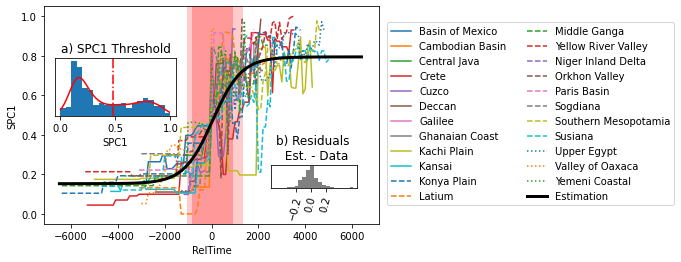

In [84]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.5, 0.28, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.65, 0.25, 0.2, 0.08]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
ax1.scatter([-T_start,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
#ax1.set_xlim([-5000, 5000])

ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals \n Est. - Data")#": Est. - Data")
#ax3.set_xlabel("Est. - Data")
#ax
ax3.set_xticks([-0.2,0,0.2])
ax3.tick_params(axis='x', rotation=75)
ax3.axes.get_yaxis().set_visible(False)
#plt.xlim(-5000,5000)

#plt.savefig("NEW_Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

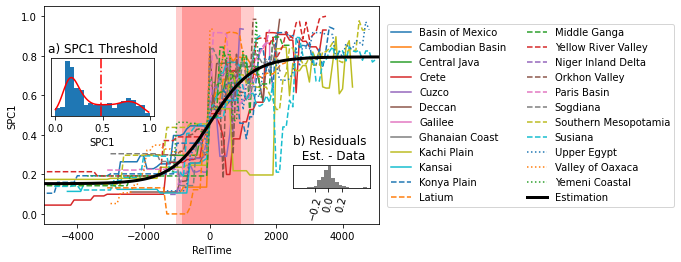

In [85]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])


ax1.set_xlim([-5000,5099])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.14, 0.5, 0.24, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.7, 0.25, 0.18, 0.08]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
ax1.scatter([-T_start,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
#lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals \n Est. - Data")#": Est. - Data")
#ax3.set_xlabel("Est. - Data")
#ax
ax3.set_xticks([-0.2,0,0.2])
ax3.tick_params(axis='x', rotation=75)
ax3.axes.get_yaxis().set_visible(False)
#plt.xlim(-5000,5000)

lgd = ax1.legend(bbox_to_anchor=[1.01, 0.5], loc='center left',ncol=2)

plt.savefig("NEW_Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [86]:
min(y_est_Residuals-y_Residuals),max(y_est_Residuals-y_Residuals)

(-0.47369399111203986, 0.5669726196777385)

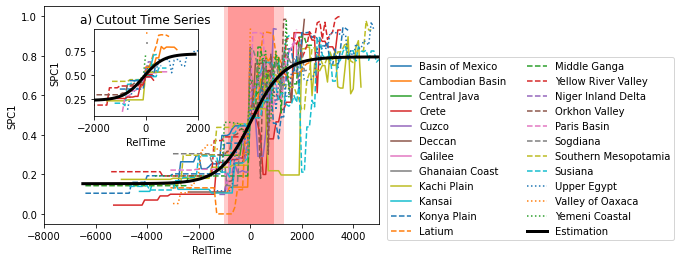

In [87]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.24, 0.5, 0.24, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

style = "-"

Colours, Styles  = dict(), dict()

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    P1 = ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    #print(P1[-1].get_color())
    Colours[N] = P1[-1].get_color()
    Styles[N] = style
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"   
    #print(N)
ax1.scatter([-T_start,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
#lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
#ax1.set_xlim([-5000, 5000])
#ax1.plot(TimeRange, New_Fit, "--",c="k", linewidth = 2)

ax1.set_xlim(-8000,5000)


for N in list(set(Snippets_DF["NGA"])):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]
    ax2.plot(DF["RelTime"],   
             DF["PC1"], Styles[N], c = Colours[N])
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    #print(N)
ax2.set_xlim(-2000,2000)
ax2.set_title("a) Cutout Time Series")
ax2.set_xlabel("RelTime")
ax2.set_ylabel("SPC1")
ax2.plot(TimeRange, New_Fit, "-",label="ESTIMATION", c = "k", linewidth=3)
lgd = ax1.legend(ncol = 2,bbox_to_anchor=(1.01, 0.79))
plt.savefig("Cutout_and_Full_Logistic_Plots.pdf",
            bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [88]:
TimeRange, New_Fit

(array([-2000, -1900, -1800, -1700, -1600, -1500, -1400, -1300, -1200,
        -1100, -1000,  -900,  -800,  -700,  -600,  -500,  -400,  -300,
         -200,  -100,     0,   100,   200,   300,   400,   500,   600,
          700,   800,   900,  1000,  1100,  1200,  1300,  1400,  1500,
         1600,  1700,  1800,  1900]),
 array([0.24380345, 0.24479164, 0.24606588, 0.24770668, 0.24981573,
        0.25252046, 0.25597891, 0.26038455, 0.26596999, 0.27300837,
        0.28181019, 0.29271281, 0.30605922, 0.32216317, 0.34125961,
        0.36344336, 0.38860584, 0.41638596, 0.44615565, 0.47705587,
        0.50808564, 0.53822723, 0.56657577, 0.59243965, 0.61539037,
        0.63525959, 0.65209681, 0.66610786, 0.67759195, 0.68688858,
        0.69433901, 0.70026183, 0.70494009, 0.70861658, 0.71149429,
        0.71373973, 0.71548756, 0.71684546, 0.71789886, 0.71871512]))

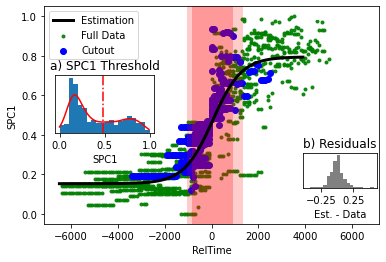

In [89]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,4000,100)/T
 
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])    # FULL REGRESSION

#y_hat = f(x_show, P0[0], P0[1], P0[2], P0[3])  # CUTOUT-REgression

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.44, 0.23, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.725, 0.25, 0.17, 0.12]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

Label1 = "Full Data"
Label2 = "Cutout"

ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.scatter(DF["RelTime"],    
             DF["PC1"],marker = ".", c = "green", label=Label1, alpha = 0.9)
    Label1 = None
    
for N in sorted(list(set(Data_RT["NGA"]))):
    
    ax1.scatter(Snippets_DF.query("NGA == @N").RelTime,
            Snippets_DF.query("NGA == @N").PC1, 
            c = "blue", label =Label2)
    
    Label2 = None
    #print(N)
ax1.scatter([-T_start,4500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend()#bbox_to_anchor=(1.01, 0.95), ncol=1)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
#ax1.set_xlim([-5000, 5000])

ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals")#": Est. - Data")
ax3.set_xlabel("Est. - Data")
ax3.set_xticks(np.arange(-0.25,0.26,0.5))
ax3.axes.get_yaxis().set_visible(False)
#plt.xlim(-5000,5000)

plt.savefig("NEW_Logistic_Residuals_RelTime_scattered.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [90]:
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)), 
      "years. The interval's start and end times are", np.round(T1_scaled), "and", np.round(T2_scaled),
      "The lower boundary's uncertainty is", np.round(T1_start_scaled), "and the upper boundary's uncertainty is", 
     np.round(T2_end_scaled), "years. Thus, the upper estimate for the time range is", np.round(T2_end_scaled-T1_start_scaled), "years.")

Most of the cultural evolution takes place in a time interval of  1771.0 years. The interval's start and end times are -846.0 and 925.0 The lower boundary's uncertainty is -1034.0 and the upper boundary's uncertainty is 1329.0 years. Thus, the upper estimate for the time range is 2363.0 years.


In [91]:
np.round(T2_scaled-T1_scaled)

1771.0

### Cutout vs Full Logistic Curve

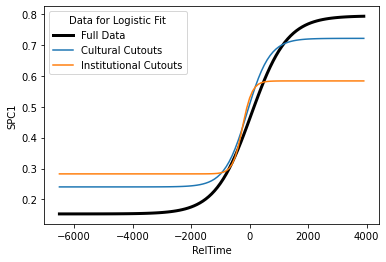

In [92]:
x_show = np.arange(T_start,4000,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

plt.plot(x_show*T, y_hat, label="Full Data", c="k", linewidth=3)
plt.plot(x_show*T,f(x_show, P0[0], P0[1], P0[2], P0[3]), label="Cultural Cutouts" )
plt.plot(x_show*T, f(x_show, P0_Polity[0], P0_Polity[1], P0_Polity[2], P0_Polity[3]),
        label="Institutional Cutouts")
plt.xlabel("RelTime")
plt.ylabel("SPC1")
plt.legend(title="Data for Logistic Fit")

plt.show()

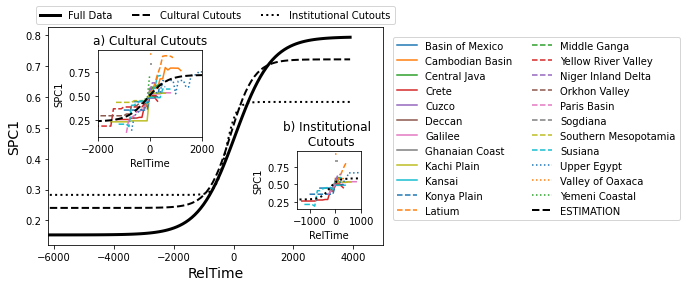

In [93]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.24, 0.5, 0.24, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.7, 0.25, 0.15, 0.2]
ax3 = fig.add_axes([left, bottom, width, height])


x_show = np.arange(T_start,4000,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

ax1.plot(x_show*T, y_hat, label="Full Data", c="k", linewidth=3)
ax1.plot(x_show*T,f(x_show, P0[0], P0[1], P0[2], P0[3]) , "--",
         c="k",label="Cultural Cutouts" , linewidth=2)
ax1.plot(x_show*T, f(x_show, P0_Polity[0], P0_Polity[1], P0_Polity[2], P0_Polity[3]),
         ":",c="k",
        label="Institutional Cutouts", linewidth=2)
ax1.set_xlabel("RelTime", fontsize = 14)
ax1.set_ylabel("SPC1", fontsize = 14)
lgd = ax1.legend(bbox_to_anchor=(1.05, 1.12), ncol=3)
ax1.set_xlim(-6200, 5000)


style = "-"
for N in sorted(list(set(Snippets_DF["NGA"]))):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]
    
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax2.plot(DF["RelTime"],   
             DF["PC1"], Styles[N], c = Colours[N],label=name)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    #print(N)
ax2.set_xlim(-2000,2000)
ax2.set_title("a) Cultural Cutouts")
ax2.set_xlabel("RelTime")
ax2.set_ylabel("SPC1")
ax2.plot(x_show*T,f(x_show, P0[0], P0[1], P0[2], P0[3]), "--",label="ESTIMATION", c = "k", linewidth=2)
plt.savefig("Cutout_and_Full_Logistic_Plots.pdf",
            bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')






for n in sorted(list(set(Snippets_Pol_DF["NGA"]))):
    smalldf = Snippets_Pol_DF.loc[Snippets_Pol_DF["NGA"]==n]
    ax3.plot(smalldf["RelTime"], smalldf["PC1"], Styles[n], c = Colours[n])
ax3.plot(x_show*T, f(x_show, P0_Polity[0], P0_Polity[1], P0_Polity[2], P0_Polity[3]),
         ":",c="k", linewidth=2)
ax3.set_xlim([-1500,1000])
ax3.set_title("b) Institutional \n Cutouts")
ax3.set_xlabel("RelTime")
ax3.set_ylabel("SPC1")

#ax1.set_ylim([0,1])

lgd = ax2.legend(ncol = 2,
                bbox_to_anchor=[2.8, 0.1], loc='center left')

plt.savefig("Compare_Cutouts.pdf", dpi=300, bbox_inches="tight")
plt.show()

#### Latium Example

In [94]:
Lat = Data.query("NGA == 'Latium'")


In [95]:
Lat.loc[:,"RelTime"] = (Lat.Time + 500).to_numpy()
Lat.head()

C:\Users\Tobias\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,NGA,PolID,Time,PC1,Culture.Cont,Polity.Cont,Notes,RelTime
622,Latium,ItLatCA,-3600,0.131959,NaN,NaN,NaN,-3100
623,Latium,ItLatCA,-3500,0.131959,NaN,NaN,NaN,-3000
624,Latium,ItLatCA,-3400,0.131959,NaN,NaN,NaN,-2900
625,Latium,ItLatCA,-3300,0.131959,NaN,NaN,NaN,-2800
626,Latium,ItLatCA,-3200,0.131959,NaN,NaN,NaN,-2700


In [96]:
Lat.query("RelTime == 0").PC1, float(Lat.query("RelTime == 0").Time)

(653    0.551834
 Name: PC1, dtype: float64,
 -500.0)

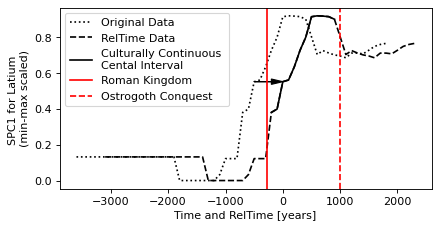

In [97]:
plt.figure(figsize=(6, 3), dpi=80)
plt.plot(Lat.Time, Lat.PC1, ":", c="k", label="Original Data")
plt.plot(Lat.RelTime, Lat.PC1, "--", c="k", label="RelTime Data")

Tzero = -500

plt.arrow(x=Tzero,
          y= 0.552, 
          dx = np.abs(Tzero), dy=0.0,
         length_includes_head=True,
         head_width = 0.03,
         head_length = 200,color = "k")

Lat_Relevant = Lat.query("Time > -770 & Time < 500")
plt.plot(Lat_Relevant.RelTime, Lat_Relevant.PC1, c="k", label="Culturally Continuous \nCental Interval")
plt.axvline(-770-Tzero, c="red", label="Roman Kingdom")
plt.axvline(500-Tzero,linestyle ="--", c="red", label="Ostrogoth Conquest")
plt.legend()
plt.xlabel("Time and RelTime [years]")
plt.ylabel("SPC1 for Latium \n(min-max scaled)")
plt.savefig("Latium_Transformation_redone.pdf", dpi= 200, bbox_inches="tight")

In [98]:
len(LargeNGAs), len(SmallNGAs)

(23, 12)

In [99]:
Large = list()
Small = list()

for n in LargeNGAs:
    Large += [Data.query("NGA == @n").shape[0]]
    
    
for n in SmallNGAs:
    Small += [Data.query("NGA == @n").shape[0]]
    

In [100]:
np.mean(np.array(Large)),np.mean(np.array(Small)) 

(57.34782608695652, 6.416666666666667)

In [101]:
np.mean(np.array(Large)) *len(Large) + len(Small)*np.mean(np.array(Small)) 

1396.0